## 1) Prediction on enrollment of courses
### Name: Garima Sharma

## 2) Library import and data loading

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso 
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [81]:
# Reading the data
df = pd.read_csv('Dataset/Lab02_GSh43374_prepared.csv')
df.head()

avg_rating  number_ratings  enrollment  last_updated  lectures  duration  \
0         4.6          6833.0     21218.0         20.83      53.0      5.23   
1         4.5          2826.0     14269.0         20.83      41.0      7.13   
2         4.4           991.0      3563.0         20.67      91.0      5.23   
3         4.2           681.0      1932.0         20.83      57.0      5.05   
4         4.3          1939.0     14048.0         13.33     142.0     10.77   

   price2  discount  inst_rating  inst_review  inst_student  inst_course  \
0   23.99      91.0          4.6      19993.0       55621.0          3.0   
1   19.99      88.0          4.5      11922.0       53659.0         10.0   
2   28.99      77.0          4.4       2193.0        7422.0          6.0   
3   16.99      64.0          4.3      25989.0      242683.0         43.0   
4   20.99      55.0          4.5      25581.0      113480.0         12.0   

   cat_design  cat_development  cat_hobby  cat_it_software  
0           0                1          0                0  
1           0                0          0                0  
2           0                0          0                0  
3           0                0          0                1  
4           0                0          0                0

In [82]:
## checking count of null values
df.isna().sum()

avg_rating         0
number_ratings     0
enrollment         0
last_updated       0
lectures           0
duration           0
price2             0
discount           0
inst_rating        0
inst_review        0
inst_student       0
inst_course        0
cat_design         0
cat_development    0
cat_hobby          0
cat_it_software    0
dtype: int64

## 3) Exploratory Data Analysis

In [83]:
## summary statistics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_rating       1455 non-null   float64
 1   number_ratings   1455 non-null   float64
 2   enrollment       1455 non-null   float64
 3   last_updated     1455 non-null   float64
 4   lectures         1455 non-null   float64
 5   duration         1455 non-null   float64
 6   price2           1455 non-null   float64
 7   discount         1455 non-null   float64
 8   inst_rating      1455 non-null   float64
 9   inst_review      1455 non-null   float64
 10  inst_student     1455 non-null   float64
 11  inst_course      1455 non-null   float64
 12  cat_design       1455 non-null   int64  
 13  cat_development  1455 non-null   int64  
 14  cat_hobby        1455 non-null   int64  
 15  cat_it_software  1455 non-null   int64  
dtypes: float64(12), int64(4)
memory usage: 182.0 KB


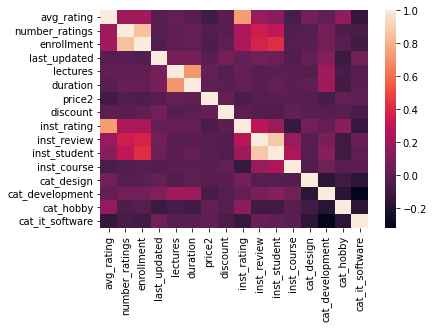

avg_rating  number_ratings  enrollment  last_updated  \
avg_rating         1.000000        0.200454    0.207510     -0.013175   
number_ratings     0.200454        1.000000    0.853691     -0.011226   
enrollment         0.207510        0.853691    1.000000     -0.039707   
last_updated      -0.013175       -0.011226   -0.039707      1.000000   
lectures           0.019096        0.010322    0.007326      0.077893   
duration          -0.017504        0.026363    0.019542      0.085966   
price2            -0.082052       -0.035223   -0.049769     -0.010121   
discount          -0.001695       -0.011101    0.003227      0.068650   
inst_rating        0.736497        0.242893    0.237112      0.030413   
inst_review        0.188549        0.346876    0.380016      0.065714   
inst_student       0.127469        0.308930    0.421044      0.042089   
inst_course       -0.062877       -0.036057   -0.024146     -0.035199   
cat_design         0.065560       -0.025443   -0.006974      0.029848   
cat_development    0.010766        0.076669    0.064016      0.118703   
cat_hobby          0.161467       -0.048992   -0.020714     -0.117070   
cat_it_software   -0.141447       -0.069379   -0.096815      0.063106   

                 lectures  duration    price2  discount  inst_rating  \
avg_rating       0.019096 -0.017504 -0.082052 -0.001695     0.736497   
number_ratings   0.010322  0.026363 -0.035223 -0.011101     0.242893   
enrollment       0.007326  0.019542 -0.049769  0.003227     0.237112   
last_updated     0.077893  0.085966 -0.010121  0.068650     0.030413   
lectures         1.000000  0.717903  0.022148 -0.029648     0.029788   
duration         0.717903  1.000000  0.001551 -0.002138     0.013956   
price2           0.022148  0.001551  1.000000  0.027805    -0.051260   
discount        -0.029648 -0.002138  0.027805  1.000000    -0.006355   
inst_rating      0.029788  0.013956 -0.051260 -0.006355     1.000000   
inst_review     -0.012769 -0.002242 -0.024331 -0.036782     0.288648   
inst_student    -0.001241  0.017686 -0.011644 -0.045179     0.188606   
inst_course     -0.006728 -0.002731 -0.000523  0.014594    -0.130596   
cat_design      -0.032364  0.004014 -0.020825 -0.008311     0.071306   
cat_development  0.206430  0.201118 -0.074453 -0.025417     0.019454   
cat_hobby       -0.074052 -0.089220  0.015422 -0.017846     0.142371   
cat_it_software -0.015455 -0.008402  0.008970 -0.057408    -0.127695   

                 inst_review  inst_student  inst_course  cat_design  \
avg_rating          0.188549      0.127469    -0.062877    0.065560   
number_ratings      0.346876      0.308930    -0.036057   -0.025443   
enrollment          0.380016      0.421044    -0.024146   -0.006974   
last_updated        0.065714      0.042089    -0.035199    0.029848   
lectures           -0.012769     -0.001241    -0.006728   -0.032364   
duration           -0.002242      0.017686    -0.002731    0.004014   
price2             -0.024331     -0.011644    -0.000523   -0.020825   
discount           -0.036782     -0.045179     0.014594   -0.008311   
inst_rating         0.288648      0.188606    -0.130596    0.071306   
inst_review         1.000000      0.871341     0.176409   -0.022900   
inst_student        0.871341      1.000000     0.242852   -0.026477   
inst_course         0.176409      0.242852     1.000000   -0.036259   
cat_design         -0.022900     -0.026477    -0.036259    1.000000   
cat_development     0.079639      0.126037     0.061448   -0.169867   
cat_hobby          -0.098813     -0.099872    -0.018124   -0.090258   
cat_it_software     0.035249      0.007515    -0.009558   -0.164233   

                 cat_development  cat_hobby  cat_it_software  
avg_rating              0.010766   0.161467        -0.141447  
number_ratings          0.076669  -0.048992        -0.069379  
enrollment              0.064016  -0.020714        -0.096815  
last_updated            0.118703  -0.117070         0.063106  
lectures                0.2

In [84]:
## checking the correlation
df.corr()

# plotting correlation heatmap
dataplot=sns.heatmap(df.corr())

# displaying heatmap
plt.show()
df.corr()

In [85]:
# absolute value of the correlation 
absolute_Corr = df.corr().abs()
# sorted value
print(absolute_Corr["enrollment"].sort_values(ascending=False))

enrollment         1.000000
number_ratings     0.853691
inst_student       0.421044
inst_review        0.380016
inst_rating        0.237112
avg_rating         0.207510
cat_it_software    0.096815
cat_development    0.064016
price2             0.049769
last_updated       0.039707
inst_course        0.024146
cat_hobby          0.020714
duration           0.019542
lectures           0.007326
cat_design         0.006974
discount           0.003227
Name: enrollment, dtype: float64


## Feature Observation and Analysis
From our previous observation, we can see that number_ratings has high correlation with enrollment. inst_student has moderate positive correlation with enrollment followed by inst_review.
Moreover, inst_rating and avg_rating has high positive correlation with each other. It is better to consider one of them for analysis. Duration and lectures also has positive high correlation. Inst_review and inst_student also has high positive correlation.

## Univariate Analysis

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='enrollment', ylabel='Density'>

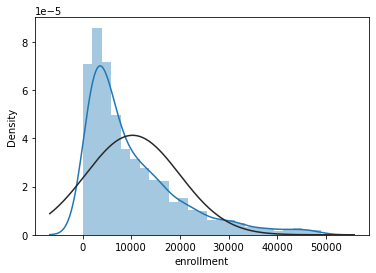

In [86]:
# distribution and histogram plot of the enrollment
from scipy.stats import norm
sns.distplot(df.enrollment, fit=norm)


We can see that the enrollment distribution (after we removed some outliers)still has a longer tail on the right.

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_ratings', ylabel='Density'>

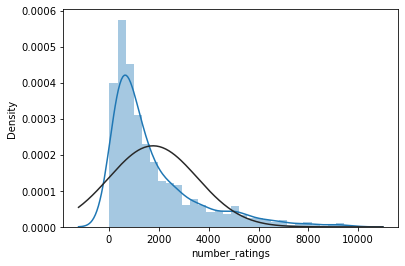

In [87]:
# fitting plot for number of ratings
sns.distplot(df.number_ratings , fit=norm)

The number of ratings distribution does not follow normal distribution as it still skewed to the right. Most of the ratings lie between 0 to 1300.

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inst_review', ylabel='Density'>

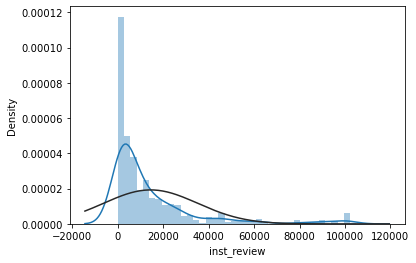

In [88]:
# fitting plot for inst_reviews
sns.distplot(df.inst_review, fit=norm)

The inst_review distribution does not follow normal distribution with as it still skewed to the right. 

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inst_student', ylabel='Density'>

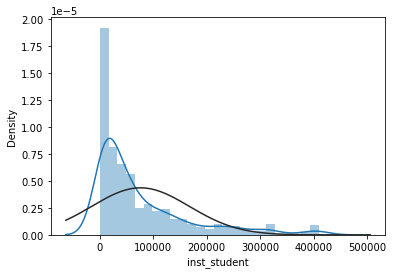

In [89]:
# fitting plot for inst_reviews
sns.distplot(df.inst_student, fit=norm)

The inst_student distribution does not follow normal distribution as it still skewed to the right but still we can consider it.

## 4) Feature Selection

In [90]:
## copy of original dataframe
df1 = df.copy()
df1

avg_rating  number_ratings  enrollment  last_updated  lectures  \
0            4.6          6833.0     21218.0         20.83      53.0   
1            4.5          2826.0     14269.0         20.83      41.0   
2            4.4           991.0      3563.0         20.67      91.0   
3            4.2           681.0      1932.0         20.83      57.0   
4            4.3          1939.0     14048.0         13.33     142.0   
...          ...             ...         ...           ...       ...   
1450         4.4           906.0      5293.0         20.83      43.0   
1451         4.4           345.0      6212.0         20.83      10.0   
1452         3.8           693.0      3254.0         20.75      20.0   
1453         4.2          3459.0     13987.0         15.50      30.0   
1454         4.5          4546.0     15793.0         20.50     267.0   

      duration  price2  discount  inst_rating  inst_review  inst_student  \
0         5.23   23.99      91.0          4.6      19993.0       55621.0   
1         7.13   19.99      88.0          4.5      11922.0       53659.0   
2         5.23   28.99      77.0          4.4       2193.0        7422.0   
3         5.05   16.99      64.0          4.3      25989.0      242683.0   
4        10.77   20.99      55.0          4.5      25581.0      113480.0   
...        ...     ...       ...          ...          ...           ...   
1450      4.75   17.99      86.0          4.4       2291.0       16633.0   
1451      5.90   16.99      89.0          4.2       9250.0      159228.0   
1452      3.13   21.99      90.0          3.8        693.0        3254.0   
1453      1.58   16.99      81.0          4.2       9123.0       64043.0   
1454     32.73   69.99      51.0          4.4      39566.0      149857.0   

      inst_course  cat_design  cat_development  cat_hobby  cat_it_software  
0             3.0           0                1          0                0  
1            10.0           0                0          0                0  
2             6.0           0                0          0                0  
3            43.0           0                0          0                1  
4            12.0           0                0          0                0  
...           ...         ...              ...        ...              ...  
1450         10.0           0                0          0                0  
1451         19.0           0                0          0                1  
1452          1.0           0                0          0                0  
1453         26.0           0                0          0                0  
1454        226.0           0                0          0                1  

[1455 rows x 16 columns]

### 4.1) Assigning the enrollment column of the dataframe to a new variable

In [91]:
target = df1.enrollment
## creating another variabzle to save the features except target column
features = df1.drop('enrollment', axis=1)


### 4.2) Manual Selection

In [92]:
# showing correlation between all features
df1.corr()
# absolute value of the correlation 
absolute_Corr = df1.corr().abs()
# sorted value
print(absolute_Corr["enrollment"].sort_values(ascending=False))

## saving selected features in new dataframe
df1_manual = pd.DataFrame(df1[['number_ratings','inst_student','inst_review']])
df1_manual

enrollment         1.000000
number_ratings     0.853691
inst_student       0.421044
inst_review        0.380016
inst_rating        0.237112
avg_rating         0.207510
cat_it_software    0.096815
cat_development    0.064016
price2             0.049769
last_updated       0.039707
inst_course        0.024146
cat_hobby          0.020714
duration           0.019542
lectures           0.007326
cat_design         0.006974
discount           0.003227
Name: enrollment, dtype: float64


number_ratings  inst_student  inst_review
0             6833.0       55621.0      19993.0
1             2826.0       53659.0      11922.0
2              991.0        7422.0       2193.0
3              681.0      242683.0      25989.0
4             1939.0      113480.0      25581.0
...              ...           ...          ...
1450           906.0       16633.0       2291.0
1451           345.0      159228.0       9250.0
1452           693.0        3254.0        693.0
1453          3459.0       64043.0       9123.0
1454          4546.0      149857.0      39566.0

[1455 rows x 3 columns]

### 4.3) Variance Threshold

In [93]:
## selecting all numerical features
df2 = features.select_dtypes(include = np.number)
## threshold is used as 0.2
vt = VarianceThreshold(threshold = 0.2)
vt.fit(df2)
## selected features are saved in new dataframe as df_vt
pd.DataFrame({'Variance': vt.variances_, 'select_status': vt.get_support()}, index = df2.columns)
df_vt = df2.iloc[:, vt.get_support()]
df_vt


number_ratings  last_updated  lectures  duration  price2  discount  \
0             6833.0         20.83      53.0      5.23   23.99      91.0   
1             2826.0         20.83      41.0      7.13   19.99      88.0   
2              991.0         20.67      91.0      5.23   28.99      77.0   
3              681.0         20.83      57.0      5.05   16.99      64.0   
4             1939.0         13.33     142.0     10.77   20.99      55.0   
...              ...           ...       ...       ...     ...       ...   
1450           906.0         20.83      43.0      4.75   17.99      86.0   
1451           345.0         20.83      10.0      5.90   16.99      89.0   
1452           693.0         20.75      20.0      3.13   21.99      90.0   
1453          3459.0         15.50      30.0      1.58   16.99      81.0   
1454          4546.0         20.50     267.0     32.73   69.99      51.0   

      inst_review  inst_student  inst_course  
0         19993.0       55621.0          3.0  
1         11922.0       53659.0         10.0  
2          2193.0        7422.0          6.0  
3         25989.0      242683.0         43.0  
4         25581.0      113480.0         12.0  
...           ...           ...          ...  
1450       2291.0       16633.0         10.0  
1451       9250.0      159228.0         19.0  
1452        693.0        3254.0          1.0  
1453       9123.0       64043.0         26.0  
1454      39566.0      149857.0        226.0  

[1455 rows x 9 columns]

### 4.4) Select k-Best method

In [94]:
# 3 features are selected
kbest = SelectKBest(score_func = f_regression, k = 3)
X_train, X_test, Y_train, Y_test = train_test_split(features, target)

kbest.fit_transform(X_train, Y_train)
df_selKBest = features.iloc[:, kbest.get_support()]
df_selKBest.head()


number_ratings  inst_review  inst_student
0          6833.0      19993.0       55621.0
1          2826.0      11922.0       53659.0
2           991.0       2193.0        7422.0
3           681.0      25989.0      242683.0
4          1939.0      25581.0      113480.0

## 5) Linear Regression Models with Feature Selection, Feature transformation and Scaling


### Here, 75:25 for training and testing and random_state=42 is used.

In [95]:
target = df1.enrollment
features = df1.drop('enrollment', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size=0.25, 
                                                    random_state=42)

### 5.0) Initiate some lists to store your experiments’ result

In [96]:
feature_selection = []
feature_transformation = []
feature_scaling = []
r2_values = []
rmse_values = []

### 5.1) Linear regression model with all features 

In [97]:
# building the model with original feature set

model = LinearRegression()
model.fit(X_train, Y_train)

# predicting the test dataset with original feature set
Y_pred = model.predict(X_test)

# Calculating R2 metrics scores
r2 = model.score(X_test, Y_test).round(4)
print("R squared= ", r2)

# Calculating RMSE metrics scores
mse = mean_squared_error(Y_test, Y_pred)
print("RMSE= ", mse**0.5)


R squared=  0.7526
RMSE=  4450.289645095032


In [98]:
## appending the following information to the lists
feature_selection.append("All")
feature_transformation.append("None")
feature_scaling.append("None")
r2_values.append(r2)
rmse_values.append(mse)

### 5.2) Linear Regression model with All features and Polynomial Features transformation

In [99]:
## polynomial degree of 2 is used
pff = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
## pf is variable for the PolynomialFeatures class 
pf = pff.fit(features)

## using get_feature_names for the column name
poly= pd.DataFrame(pff.transform(features), columns = pf.get_feature_names(features.columns))
poly


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


avg_rating  number_ratings  last_updated  lectures  duration  price2  \
0            4.6          6833.0         20.83      53.0      5.23   23.99   
1            4.5          2826.0         20.83      41.0      7.13   19.99   
2            4.4           991.0         20.67      91.0      5.23   28.99   
3            4.2           681.0         20.83      57.0      5.05   16.99   
4            4.3          1939.0         13.33     142.0     10.77   20.99   
...          ...             ...           ...       ...       ...     ...   
1450         4.4           906.0         20.83      43.0      4.75   17.99   
1451         4.4           345.0         20.83      10.0      5.90   16.99   
1452         3.8           693.0         20.75      20.0      3.13   21.99   
1453         4.2          3459.0         15.50      30.0      1.58   16.99   
1454         4.5          4546.0         20.50     267.0     32.73   69.99   

      discount  inst_rating  inst_review  inst_student  ...  cat_design^2  \
0         91.0          4.6      19993.0       55621.0  ...           0.0   
1         88.0          4.5      11922.0       53659.0  ...           0.0   
2         77.0          4.4       2193.0        7422.0  ...           0.0   
3         64.0          4.3      25989.0      242683.0  ...           0.0   
4         55.0          4.5      25581.0      113480.0  ...           0.0   
...        ...          ...          ...           ...  ...           ...   
1450      86.0          4.4       2291.0       16633.0  ...           0.0   
1451      89.0          4.2       9250.0      159228.0  ...           0.0   
1452      90.0          3.8        693.0        3254.0  ...           0.0   
1453      81.0          4.2       9123.0       64043.0  ...           0.0   
1454      51.0          4.4      39566.0      149857.0  ...           0.0   

      cat_design cat_development  cat_design cat_hobby  \
0                            0.0                   0.0   
1                            0.0                   0.0   
2                            0.0                   0.0   
3                            0.0                   0.0   
4                            0.0                   0.0   
...                          ...                   ...   
1450                         0.0                   0.0   
1451                         0.0                   0.0   
1452                         0.0                   0.0   
1453                         0.0                   0.0   
1454                         0.0                   0.0   

      cat_design cat_it_software  cat_development^2  \
0                            0.0                1.0   
1                            0.0                0.0   
2                            0.0                0.0   
3                            0.0                0.0   
4                            0.0                0.0   
...                          ...                ...   
1450                         0.0                0.0   
1451                         0.0                0.0   
1452                         0.0                0.0   
1453                         0.0                0.0   
1454                         0.0                0.0   

      cat_development cat_hobby  cat_development cat_it_software  cat_hobby^2  \
0                           0.0                              0.0          0.0   
1                           0.0                              0.0          0.0   
2                           0.0                              0.0          0.0   
3                           0.0                              0.0          0.0   
4                           0.0                              0.0          0.0   
...                         ...                              ...          ...   
1450                        0.0                              0.0          0.0   
1451                        0.0                              0.0          0.0   
1452                        0.0                          

In [100]:
target = df1.enrollment
X_train, X_test, Y_train, Y_test = train_test_split(poly,target, test_size=0.25, random_state=42) 
      
# building the model using original features and Polynomial Features transformation
modelPolynomial = LinearRegression()
modelPolynomial.fit(X_train, Y_train)    


LinearRegression()

In [101]:
# predicting the test dataset using original features and Polynomial Features transformation
Y_pred = modelPolynomial.predict(X_test)

# calculating R-squared metrics scores
r2_poly = modelPolynomial.score(X_test, Y_test).round(4)
print("R squared= ", r2_poly)

# calculating RMSE metrics scores
mse_poly = mean_squared_error(Y_test, Y_pred)
print("RMSE= ", mse_poly**0.5)



R squared=  0.5838
RMSE=  5771.942315282742


In [102]:
# appending the following information to the lists
feature_selection.append("All")
feature_transformation.append("Poly 2")
feature_scaling.append("None")
r2_values.append(r2_poly)
rmse_values.append(mse_poly)

In [103]:
## dataframe without target
df2.head()

avg_rating  number_ratings  last_updated  lectures  duration  price2  \
0         4.6          6833.0         20.83      53.0      5.23   23.99   
1         4.5          2826.0         20.83      41.0      7.13   19.99   
2         4.4           991.0         20.67      91.0      5.23   28.99   
3         4.2           681.0         20.83      57.0      5.05   16.99   
4         4.3          1939.0         13.33     142.0     10.77   20.99   

   discount  inst_rating  inst_review  inst_student  inst_course  cat_design  \
0      91.0          4.6      19993.0       55621.0          3.0           0   
1      88.0          4.5      11922.0       53659.0         10.0           0   
2      77.0          4.4       2193.0        7422.0          6.0           0   
3      64.0          4.3      25989.0      242683.0         43.0           0   
4      55.0          4.5      25581.0      113480.0         12.0           0   

   cat_development  cat_hobby  cat_it_software  
0                1          0                0  
1                0          0                0  
2                0          0                0  
3                0          0                1  
4                0          0                0

### 5.3) Linear Regression model with All features and Log1P transformation

In [104]:
log = lambda x: np.log1p(x)
# log transformation of all features
features_log = df2.apply(log)
features_log
X_train, X_test, Y_train, Y_test = train_test_split(features_log,target, test_size=0.25, 
   random_state=42)
# building the model using original features and Log transformation
model_Log = LinearRegression()
model_Log.fit(X_train, Y_train)

# get the predictions for the test dataset using original features and Log transformation
Y_pred = model_Log.predict(X_test)

# calculating R2 metrics scores
r2_log = model_Log.score(X_test, Y_test).round(4)
print("R2 =",r2_log)

# calculating RMSE metrics scores
mse2_log = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_log**0.5)



R2 = 0.6255
RMSE =  5475.518280457208


In [105]:
# appending the following information to the lists
feature_selection.append("All")
feature_transformation.append("Log1P")
feature_scaling.append("None")
r2_values.append(r2_log)
rmse_values.append(mse2_log)

### 5.4) Linear Regression model with All features and MinMax Scaling

In [106]:
ms = MinMaxScaler()
scaled_features = ms.fit_transform(features)

#  new dataframe
scaled_Features_All = pd.DataFrame(scaled_features, columns = features.columns)
scaled_Features_All


avg_rating  number_ratings  last_updated  lectures  duration    price2  \
0       0.727273        0.700442      1.000000  0.069465  0.034003  0.038251   
1       0.636364        0.288665      1.000000  0.052098  0.049459  0.016393   
2       0.545455        0.100092      0.982533  0.124457  0.034003  0.065574   
3       0.363636        0.068236      1.000000  0.075253  0.032539  0.000000   
4       0.454545        0.197513      0.181223  0.198263  0.079069  0.021858   
...          ...             ...           ...       ...       ...       ...   
1450    0.545455        0.091358      1.000000  0.054993  0.030098  0.005464   
1451    0.545455        0.033707      1.000000  0.007236  0.039453  0.000000   
1452    0.000000        0.069469      0.991266  0.021708  0.016920  0.027322   
1453    0.363636        0.353715      0.418122  0.036179  0.004311  0.000000   
1454    0.636364        0.465420      0.963974  0.379161  0.257708  0.289617   

      discount  inst_rating  inst_review  inst_student  inst_course  \
0     0.983871     0.882353     0.190154      0.125811     0.001409   
1     0.935484     0.823529     0.113271      0.121369     0.006342   
2     0.758065     0.764706     0.020595      0.016680     0.003524   
3     0.548387     0.705882     0.247271      0.549351     0.029598   
4     0.403226     0.823529     0.243384      0.256813     0.007752   
...        ...          ...          ...           ...          ...   
1450  0.903226     0.764706     0.021528      0.037535     0.006342   
1451  0.951613     0.647059     0.087818      0.360395     0.012685   
1452  0.967742     0.411765     0.006306      0.007243     0.000000   
1453  0.822581     0.647059     0.086609      0.144880     0.017618   
1454  0.338710     0.764706     0.376603      0.339177     0.158562   

      cat_design  cat_development  cat_hobby  cat_it_software  
0            0.0              1.0        0.0              0.0  
1            0.0              0.0        0.0              0.0  
2            0.0              0.0        0.0              0.0  
3            0.0              0.0        0.0              1.0  
4            0.0              0.0        0.0              0.0  
...          ...              ...        ...              ...  
1450         0.0              0.0        0.0              0.0  
1451         0.0              0.0        0.0              1.0  
1452         0.0              0.0        0.0              0.0  
1453         0.0              0.0        0.0              0.0  
1454         0.0              0.0        0.0              1.0  

[1455 rows x 15 columns]

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_Features_All, target, test_size=0.25, 
   random_state=42)
# building the model using original features and minMax scaling
model_MinMax = LinearRegression()
model_MinMax.fit(X_train, Y_train)

# get the predictions for the test dataset using original features and minMax scaling
Y_pred = model_MinMax.predict(X_test)

# calculating R2 metrics scores
r2_minMax = model_MinMax.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax)

# calculating RMSE metrics scores
mse2_minMax = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax**0.5)



R2 = 0.7526
RMSE =  4450.289645095106


In [108]:
# appending the following information to the lists
feature_selection.append("All")
feature_transformation.append("None")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax)
rmse_values.append(mse2_minMax)

### 5.5) Linear Regression model with All features, Polynomial Features and MinMax Scaling


In [109]:
# Using a polynomial degree of 2 (without bias) and MinMax scaling
pf_f = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
pf = pf_f.fit(features)

poly_f= pd.DataFrame(pf_f.transform(features), columns = pf.get_feature_names(features.columns))
poly_f

# minmax scaling
ms_poly = MinMaxScaler()
scaled_features = ms_poly.fit_transform(poly_f)

# renaming dataframe
features_MinMax_pm = pd.DataFrame(scaled_features, columns = poly_f.columns)
features_MinMax_pm



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


avg_rating  number_ratings  last_updated  lectures  duration    price2  \
0       0.727273        0.700442      1.000000  0.069465  0.034003  0.038251   
1       0.636364        0.288665      1.000000  0.052098  0.049459  0.016393   
2       0.545455        0.100092      0.982533  0.124457  0.034003  0.065574   
3       0.363636        0.068236      1.000000  0.075253  0.032539  0.000000   
4       0.454545        0.197513      0.181223  0.198263  0.079069  0.021858   
...          ...             ...           ...       ...       ...       ...   
1450    0.545455        0.091358      1.000000  0.054993  0.030098  0.005464   
1451    0.545455        0.033707      1.000000  0.007236  0.039453  0.000000   
1452    0.000000        0.069469      0.991266  0.021708  0.016920  0.027322   
1453    0.363636        0.353715      0.418122  0.036179  0.004311  0.000000   
1454    0.636364        0.465420      0.963974  0.379161  0.257708  0.289617   

      discount  inst_rating  inst_review  inst_student  ...  cat_design^2  \
0     0.983871     0.882353     0.190154      0.125811  ...           0.0   
1     0.935484     0.823529     0.113271      0.121369  ...           0.0   
2     0.758065     0.764706     0.020595      0.016680  ...           0.0   
3     0.548387     0.705882     0.247271      0.549351  ...           0.0   
4     0.403226     0.823529     0.243384      0.256813  ...           0.0   
...        ...          ...          ...           ...  ...           ...   
1450  0.903226     0.764706     0.021528      0.037535  ...           0.0   
1451  0.951613     0.647059     0.087818      0.360395  ...           0.0   
1452  0.967742     0.411765     0.006306      0.007243  ...           0.0   
1453  0.822581     0.647059     0.086609      0.144880  ...           0.0   
1454  0.338710     0.764706     0.376603      0.339177  ...           0.0   

      cat_design cat_development  cat_design cat_hobby  \
0                            0.0                   0.0   
1                            0.0                   0.0   
2                            0.0                   0.0   
3                            0.0                   0.0   
4                            0.0                   0.0   
...                          ...                   ...   
1450                         0.0                   0.0   
1451                         0.0                   0.0   
1452                         0.0                   0.0   
1453                         0.0                   0.0   
1454                         0.0                   0.0   

      cat_design cat_it_software  cat_development^2  \
0                            0.0                1.0   
1                            0.0                0.0   
2                            0.0                0.0   
3                            0.0                0.0   
4                            0.0                0.0   
...                          ...                ...   
1450                         0.0                0.0   
1451                         0.0                0.0   
1452                         0.0                0.0   
1453                         0.0                0.0   
1454                         0.0                0.0   

      cat_development cat_hobby  cat_development cat_it_software  cat_hobby^2  \
0                           0.0                              0.0          0.0   
1                           0.0                              0.0          0.0   
2                           0.0                              0.0          0.0   
3                           0.0                              0.0          0.0   
4                           0.0                              0.0          0.0   
...                         ...                              ...          ...   
1450                        0.0                              0.0          0.0   
1451                        0.0                              0.0          0.0   
1452                        0.0  

In [110]:
# fitting the model
X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_pm, target, test_size=0.25, 
   random_state=42)

# building the model using original features
model_MinMax_pm = LinearRegression()
model_MinMax_pm.fit(X_train, Y_train)

# get the predictions for the test dataset
Y_pred = model_MinMax_pm.predict(X_test)

# R-squared metric scores
r2_minMax_pm = model_MinMax_pm.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_pm)

# RMSE metric scores
mse2_minMax_pm = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_pm**0.5)



R2 = 0.5838
RMSE =  5771.943617309929


In [111]:
#appending the following information to the lists
feature_selection.append("All")
feature_transformation.append("Poly 2")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_pm)
rmse_values.append(mse2_minMax_pm)

### 5.6) Linear Regression model with All features, Log1P Transformation and MinMax Scaling

In [112]:
#Linear Regression model with All features, Log1P Transformation and MinMax Scaling
log = lambda x: np.log1p(x)
# log transformation of all features
features_logMin = df2.apply(log)
features_logMin

# minmax scaling
ms_logMin = MinMaxScaler()
scaled_features = ms_logMin.fit_transform(features_logMin)

# renaming dataframe
features_MinMax_lm = pd.DataFrame(scaled_features, columns = features_logMin.columns)
features_MinMax_lm.head()


avg_rating  number_ratings  last_updated  lectures  duration    price2  \
0    0.747084        0.943562      1.000000  0.462085  0.270426  0.136179   
1    0.659758        0.803330      1.000000  0.409232  0.335186  0.063905   
2    0.570830        0.636956      0.986478  0.574135  0.270426  0.211751   
3    0.387923        0.577430      1.000000  0.477113  0.263293  0.000000   
4    0.480239        0.743512      0.226300  0.666891  0.425202  0.083189   

   discount  inst_rating  inst_review  inst_student  inst_course  cat_design  \
0  0.990159     0.898835     0.795132      0.769076     0.105567         0.0   
1  0.959983     0.846889     0.731279      0.765074     0.259634         0.0   
2  0.839897     0.793990     0.522197      0.544628     0.190796         0.0   
3  0.673941     0.740102     0.827528      0.933254     0.470767         0.0   
4  0.538283     0.846889     0.825574      0.848543     0.285076         0.0   

   cat_development  cat_hobby  cat_it_software  
0              1.0        0.0              0.0  
1              0.0        0.0              0.0  
2              0.0        0.0              0.0  
3              0.0        0.0              1.0  
4              0.0        0.0              0.0

In [113]:
# fitting the model
X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_lm, target, test_size=0.25, 
   random_state=42)

# building the model using original features
model_MinMax_lm = LinearRegression()
model_MinMax_lm.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMax_lm.predict(X_test)

# R-squared metric  scores
r2_minMax_lm = model_MinMax_lm.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_lm)

# RMSE metric scores
mse2_minMax_lm = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_lm**0.5)



R2 = 0.6255
RMSE =  5475.518280457207


In [114]:
#appending the following information to the lists
feature_selection.append("All")
feature_transformation.append("Log1P")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_lm)
rmse_values.append(mse2_minMax_lm)

### 5.h.1 Linear Regression model with Manual Selection

In [115]:
#using dataframe obtained in step 4
df1_manual.head()

number_ratings  inst_student  inst_review
0          6833.0       55621.0      19993.0
1          2826.0       53659.0      11922.0
2           991.0        7422.0       2193.0
3           681.0      242683.0      25989.0
4          1939.0      113480.0      25581.0

In [116]:
# response variable
target = df1.enrollment
# fitting model
X_train, X_test, Y_train, Y_test = train_test_split(df1_manual,target, test_size=0.25, 
                                                    random_state=42)

# building the model using manual selection
model_manual = LinearRegression()
model_manual.fit(X_train, Y_train)

# predicting the test dataset
Y_pred = model_manual.predict(X_test)

# R-squared metric scores
r2_manual = model_manual.score(X_test, Y_test).round(4)
print("R2 =",r2_manual)

# RMSE metric scores
mse2_manual = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_manual**0.5)



R2 = 0.7507
RMSE =  4467.404078359277


In [117]:
#appending the following information to the lists
feature_selection.append("Manual")
feature_transformation.append("None")
feature_scaling.append("None")
r2_values.append(r2_manual)
rmse_values.append(mse2_manual)

### 5.h.2) Linear Regression model with manual selection and Polynomial Features transformation

In [118]:
pff = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
pf = pff.fit(df1_manual)

# using the get_feature_names for the column name
poly_manual= pd.DataFrame(pff.transform(df1_manual), columns = pf.get_feature_names(df1_manual.columns))
poly_manual
#response variable
target = df1.enrollment

# fitting model
X_train, X_test, Y_train, Y_test = train_test_split(poly_manual,target, test_size=0.25, random_state=42) 
      
# building the model
modelPolynomial_manual = LinearRegression()
modelPolynomial_manual.fit(X_train, Y_train)    

# predicting the test dataset
Y_pred = modelPolynomial_manual.predict(X_test)
# R-squared metric scores
r2_polyManual = modelPolynomial_manual.score(X_test, Y_test).round(4)
print("R squared = ", r2_polyManual)

# RMSE metric scores
mse_polyManual = mean_squared_error(Y_test, Y_pred)
print("RMSE = ", mse_polyManual**0.5)



R squared =  0.7488
RMSE =  4484.156850576802


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [119]:
#appending the following information to the lists
feature_selection.append("Manual")
feature_transformation.append("Poly 2")
feature_scaling.append("None")
r2_values.append(r2_polyManual)
rmse_values.append(mse_polyManual)

### 5.h.3) Linear Regression model with Manual Selection and Log1P transformation

In [120]:
# using log transformation
log = lambda x: np.log1p(x)
# log of all selected features
features_logManual = df1_manual.apply(log)
features_logManual
X_train, X_test, Y_train, Y_test = train_test_split(features_logManual,target, test_size=0.25, 
   random_state=42)

# fitting the model
model_LogManual = LinearRegression()
model_LogManual.fit(X_train, Y_train)

# get the predictions for the test dataset
Y_pred = model_LogManual.predict(X_test)

# R-squared metric scores
r2_logManual = model_LogManual.score(X_test, Y_test).round(4)
print("R2 =",r2_logManual)

# RMSE metric scores
mse2_logManual = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_logManual**0.5)



R2 = 0.627
RMSE =  5464.327063240488


In [121]:
#appending the following information to the lists
feature_selection.append("Manual")
feature_transformation.append("Log1P")
feature_scaling.append("None")
r2_values.append(r2_logManual)
rmse_values.append(mse2_logManual)

### 5.h.4) Linear Regression model with Manual Selection and MinMax Scaling

In [122]:
ms = MinMaxScaler()
scaled_features = ms.fit_transform(df1_manual)

# creating the dataframe
df1_manual = pd.DataFrame(scaled_features, columns = df1_manual.columns)
features_MinMax_Manual
#fitting model
X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_Manual, target, test_size=0.25, 
   random_state=42)

# linear regression model
model_MinMaxManual = LinearRegression()
model_MinMaxManual.fit(X_train, Y_train)

# getting the predictions for the test dataset using manual selection
Y_pred = model_MinMaxManual.predict(X_test)

# R-squared metric scores
r2_minMaxManual = model_MinMaxManual.score(X_test, Y_test).round(4)
print("R2 =",r2_minMaxManual)

# RMSE metric scores
mse2_minMaxManual = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMaxManual**0.5)



R2 = 0.7507
RMSE =  4467.404078359277


In [123]:
#appending the following information to the lists
feature_selection.append("Manual")
feature_transformation.append("None")
feature_scaling.append("MinMax")
r2_values.append(r2_minMaxManual)
rmse_values.append(mse2_minMaxManual)

### 5.h.5) Linear Regression model with Manual Selection, Polynomial Features and MinMax Scaling

In [124]:
#polynomial transformation
pf_manual = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
pf = pf_manual.fit(df1_manual)
poly_manual1= pd.DataFrame(pf_manual.transform(df1_manual), columns = pf.get_feature_names(df1_manual.columns))
poly_manual1
# response variable
target = df1.enrollment

# minmax scaling
ms_polyManual = MinMaxScaler()
scaled_features = ms_polyManual.fit_transform(poly_manual1)

# remaking the dataframe
features_MinMax_pmin = pd.DataFrame(scaled_features, columns = poly_manual1.columns)
features_MinMax_pmin

# fitting model
X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_pmin, target, test_size=0.25, 
   random_state=42)

model_MinMax_pmm = LinearRegression()
model_MinMax_pmm.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMax_pmm.predict(X_test)

# R-squared metirc scores
r2_minMax_pmm = model_MinMax_pmm.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_pmm)

# RMSE metric scores
mse2_minMax_pmm = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_pmm**0.5)



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


R2 = 0.7488
RMSE =  4484.156850518718


In [125]:
#appending the following information to the lists
feature_selection.append("Manual")
feature_transformation.append("Poly 2")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_pmm)
rmse_values.append(mse2_minMax_pmm)

### 5.h.6) Linear Regression model with Manual Selection, Log1P Transformation and MinMax Scaling

In [126]:
#log of features
log = lambda x: np.log1p(x)
features_logMinManual = df1_manual.apply(log)
features_logMinManual

# minmax scaling
ms_logMinManual = MinMaxScaler()
scaled_features = ms_logMinManual.fit_transform(features_logMinManual)

# remaking the dataframe
features_MinMax_lmm = pd.DataFrame(scaled_features, columns = features_logMinManual.columns)
features_MinMax_lmm
# fitting model
X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_lm, target, test_size=0.25, 
   random_state=42)

# linear regression model
model_MinMax_lmm = LinearRegression()
model_MinMax_lmm.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMax_lmm.predict(X_test)

# R-squared metric score
r2_minMax_lmm = model_MinMax_lmm.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_lmm)

# RMSE metric score
mse2_minMax_lmm = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_lmm**0.5)



R2 = 0.6255
RMSE =  5475.518280457207


In [127]:
#appending the following information to the lists
feature_selection.append("Manual")
feature_transformation.append("Log1P")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_lmm)
rmse_values.append(mse2_minMax_lmm)

### 5.i.1) Linear Regression model with Variance Threshold Selection

In [128]:
# dataframe obtained at step 4.c
df_vt.head()

number_ratings  last_updated  lectures  duration  price2  discount  \
0          6833.0         20.83      53.0      5.23   23.99      91.0   
1          2826.0         20.83      41.0      7.13   19.99      88.0   
2           991.0         20.67      91.0      5.23   28.99      77.0   
3           681.0         20.83      57.0      5.05   16.99      64.0   
4          1939.0         13.33     142.0     10.77   20.99      55.0   

   inst_review  inst_student  inst_course  
0      19993.0       55621.0          3.0  
1      11922.0       53659.0         10.0  
2       2193.0        7422.0          6.0  
3      25989.0      242683.0         43.0  
4      25581.0      113480.0         12.0

In [129]:
target = df1.enrollment
# fitting model
X_train, X_test, Y_train, Y_test = train_test_split(df_vt,target, test_size=0.25, 
                                                    random_state=42)
# building the model
model_variance = LinearRegression()
model_variance.fit(X_train, Y_train)

# predicting the test dataset using Variance Threshold Selection
Y_pred = model_variance.predict(X_test)

# R-squared metric score
r2_variance = model_variance.score(X_test, Y_test).round(4)
print("R2 =",r2_variance)

# RMSE metric score
mse2_variance = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_variance**0.5)



R2 = 0.7497
RMSE =  4476.089110476118


In [130]:
# appending the following information to the lists
feature_selection.append("VT")
feature_transformation.append("None")
feature_scaling.append("None")
r2_values.append(r2_variance)
rmse_values.append(mse2_variance)

### 5.i.2) Linear Regression model with Variance Threshold and Polynomial Features transformation

In [131]:
# Polynomial Features transformation
pf_variance = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
pf_vari = pf_variance.fit(df_vt)

# using the get_feature_names for the column name
poly_variance= pd.DataFrame(pf_variance.transform(df_vt), columns = pf_vari.get_feature_names(df_vt.columns))
poly_variance

target = df1.enrollment
X_train, X_test, Y_train, Y_test = train_test_split(poly_variance,target, test_size=0.25, random_state=42) 
      
# building the model
modelPolynomial_variance = LinearRegression()
modelPolynomial_variance.fit(X_train, Y_train)    

# predicting the test dataset
Y_pred = modelPolynomial_variance.predict(X_test)
# R-squared metric score
r2_poly_variance = modelPolynomial_variance.score(X_test, Y_test).round(4)
print("R squared is ", r2_poly_variance)

# RMSE metric score
mse_poly_variance = mean_squared_error(Y_test, Y_pred)
print("RMSE is ", mse_poly_variance**0.5)



R squared is  0.6983
RMSE is  4914.76859411067


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [132]:
# appending the following information to the lists
feature_selection.append("VT")
feature_transformation.append("Poly 2")
feature_scaling.append("None")
r2_values.append(r2_poly_variance)
rmse_values.append(mse_poly_variance)

### 5.i.3) Linear Regression with Variance Threshold and Log1P transformation

In [133]:
# log transformation
log = lambda x: np.log1p(x)

features_logVariance = df_vt.apply(log)
features_logVariance
X_train, X_test, Y_train, Y_test = train_test_split(features_logVariance,target, test_size=0.25, 
   random_state=42)
# linear regression model
model_LogVariance = LinearRegression()
model_LogVariance.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_LogVariance.predict(X_test)

# R-squared metric score
r2_logVariance = model_LogVariance.score(X_test, Y_test).round(4)
print("R2 =",r2_logVariance)

# RMSE metric score
mse2_logVariance = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_logVariance**0.5)



R2 = 0.6233
RMSE =  5491.111305408759


In [134]:
# appending the following information to the lists
feature_selection.append("VT")
feature_transformation.append("Log1P")
feature_scaling.append("None")
r2_values.append(r2_logVariance)
rmse_values.append(mse2_logVariance)

### 5.i.4) Linear Regression model with Variance Threshold and MinMax Scaling

In [135]:
# minMax scaler
ms_var = MinMaxScaler()
scaled_features = ms_var.fit_transform(df_vt)

# Remaking the dataframe
features_MinMax_Variance = pd.DataFrame(scaled_features, columns = df_vt.columns)
features_MinMax_Variance

X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_Variance, target, test_size=0.25, 
   random_state=42)

# building the linear regression model
model_MinMaxVariance = LinearRegression()
model_MinMaxVariance.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMaxVariance.predict(X_test)

# R-squared metric score
r2_minMaxVariance = model_MinMaxVariance.score(X_test, Y_test).round(4)
print("R2 =",r2_minMaxVariance)

# RMSE metric score
mse2_minMaxVariance = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMaxVariance**0.5)



R2 = 0.7497
RMSE =  4476.089110475981


In [136]:
# appending the following information to the lists
feature_selection.append("VT")
feature_transformation.append("None")
feature_scaling.append("MinMax")
r2_values.append(r2_minMaxVariance)
rmse_values.append(mse2_minMaxVariance)

### 5.i.5) Linear Regression model with Variance Threshold, Polynomial Features and MinMax Scaling

In [137]:
# polynomial features
pf_variance = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
pf = pf_variance.fit(df_vt)

# Using the get_feature_names for the column name
poly_variance1= pd.DataFrame(pf_variance.transform(df_vt), columns = pf.get_feature_names(df_vt.columns))
poly_variance1
#response variable
target = df1.enrollment

# minmax scaling
ms_polyvariance = MinMaxScaler()
scaled_features = ms_polyvariance.fit_transform(poly_variance1)

# Remaking the dataframe
features_MinMax_pmin_variance = pd.DataFrame(scaled_features, columns = poly_variance1.columns)
features_MinMax_pmin_variance

X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_pmin_variance, target, test_size=0.25, 
   random_state=42)
# building the linear regression model
model_MinMax_pmmvariance = LinearRegression()
model_MinMax_pmmvariance.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMax_pmmvariance.predict(X_test)

# R-squared metric score
r2_minMax_pmmvariance = model_MinMax_pmmvariance.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_pmmvariance)

# RMSE metric score
mse2_minMax_pmmvariance = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_pmmvariance**0.5)



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


R2 = 0.6983
RMSE =  4914.771345243868


In [138]:
# appending the following information to the lists
feature_selection.append("VT")
feature_transformation.append("Poly 2")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_pmmvariance)
rmse_values.append(mse2_minMax_pmmvariance)

### 5.i.6) Linear Regression model with Variance Threshold, Log1P Transformation and MinMax Scaling

In [139]:
log = lambda x: np.log1p(x)
# log transformation of selected features
features_logMinVariance = df_vt.apply(log)
features_logMinVariance

# minmax scaling
ms_logMinVariance = MinMaxScaler()
scaled_features = ms_logMinVariance.fit_transform(features_logMinVariance)

# Remaking the dataframe
features_MinMax_lmVariance = pd.DataFrame(scaled_features, columns = features_logMinVariance.columns)
features_MinMax_lmVariance

X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_lmVariance, target, test_size=0.25, 
   random_state=42)

# building the linear regression model 
model_MinMax_lmVariance = LinearRegression()
model_MinMax_lmVariance.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMax_lmVariance.predict(X_test)

# R-squared metric score
r2_minMax_lmVariance = model_MinMax_lmVariance.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_lmVariance)

# RMSE metric score
mse2_minMax_lmVariance = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_lmVariance**0.5)



R2 = 0.6233
RMSE =  5491.111305408758


In [140]:
# appending the following information to the lists
feature_selection.append("VT")
feature_transformation.append("Log1P")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_lmVariance)
rmse_values.append(mse2_minMax_lmVariance)

### 5.j.1)  Linear Regression model with SelectKBest Selection 

In [141]:
# using dataframe obtained from one of the previous steps
df_selKBest.head()

number_ratings  inst_review  inst_student
0          6833.0      19993.0       55621.0
1          2826.0      11922.0       53659.0
2           991.0       2193.0        7422.0
3           681.0      25989.0      242683.0
4          1939.0      25581.0      113480.0

### Linear Regression model with SelectKBest Selection

In [142]:
# response variable
target = df1.enrollment
X_train, X_test, Y_train, Y_test = train_test_split(df_selKBest,target, test_size=0.25, 
                                                    random_state=42)
# building the model
model_kBest = LinearRegression()
model_kBest.fit(X_train, Y_train)

# predicting the test dataset
Y_pred = model_kBest.predict(X_test)

# R-squared metric score
r2_kBest = model_kBest.score(X_test, Y_test).round(4)
print("R2 =",r2_kBest)

# RMSE metric score
mse2_kBest = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_kBest**0.5)



R2 = 0.7507
RMSE =  4467.404078359277


In [143]:
# appending the following information to the lists
feature_selection.append("SelectKBest")
feature_transformation.append("None")
feature_scaling.append("None")
r2_values.append(r2_kBest)
rmse_values.append(mse2_kBest)

### 5.j.2) Linear Regression model with SelectKBest Selection and Polynomial Features transformation

In [144]:
# using Polynomial Features transformation
pf_SelectKBest = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
pf_kbest = pf_SelectKBest.fit(df_selKBest)

# Using the get_feature_names for the column name
poly_SelectKBest= pd.DataFrame(pf_SelectKBest.transform(df_selKBest), columns = pf_kbest.get_feature_names(df_selKBest.columns))
poly_SelectKBest

# response variable
target = df1.enrollment
X_train, X_test, Y_train, Y_test = train_test_split(poly_SelectKBest,target, test_size=0.25, random_state=42) 
      
# building the model
modelPolynomial_SelectKBest = LinearRegression()
modelPolynomial_SelectKBest.fit(X_train, Y_train)    

# predicting the test dataset
Y_pred = modelPolynomial_SelectKBest.predict(X_test)
# R-squared metric score
r2_poly_SelectKBest = modelPolynomial_SelectKBest.score(X_test, Y_test).round(4)
print("R squared is ", r2_poly_SelectKBest)

# RMSE metric score
mse_poly_SelectKBest = mean_squared_error(Y_test, Y_pred)
print("RMSE is ", mse_poly_SelectKBest**0.5)



R squared is  0.7488
RMSE is  4484.156850420026


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [145]:
# appending the following information to the lists
feature_selection.append("SelectKBest")
feature_transformation.append("Poly 2")
feature_scaling.append("None")
r2_values.append(r2_poly_SelectKBest)
rmse_values.append(mse_poly_SelectKBest)

### 5.j.3) Linear Regression model with SelectKBest Selection and Log1P transformation

In [146]:
# log transformation
log = lambda x: np.log1p(x)

features_log_selKBest = df_selKBest.apply(log)
features_log_selKBest
X_train, X_test, Y_train, Y_test = train_test_split(features_log_selKBest,target, test_size=0.25, 
   random_state=42)
# building the linear regression model using SelectKBest Selection
model_Log_selKBest = LinearRegression()
model_Log_selKBest.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_Log_selKBest.predict(X_test)

# R-squared metric score
r2_log_selKBest = model_Log_selKBest.score(X_test, Y_test).round(4)
print("R2 =",r2_log_selKBest)

# RMSE metric score
mse2_log_selKBest = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_log_selKBest**0.5)



R2 = 0.627
RMSE =  5464.327063240487


In [147]:
# appending the following information to the lists
feature_selection.append("SelectKBest")
feature_transformation.append("Log1P")
feature_scaling.append("None")
r2_values.append(r2_log_selKBest)
rmse_values.append(mse2_log_selKBest)

### 5.j.4) Linear Regression model with SelectKBest Selection and MinMax Scaling

In [148]:
# minMax scaling
msSelectKBest = MinMaxScaler()
scaled_features = msSelectKBest.fit_transform(df_selKBest)

# Remaking the dataframe
features_MinMax_SelectKBest = pd.DataFrame(scaled_features, columns = df_selKBest.columns)
features_MinMax_SelectKBest

X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_SelectKBest, target, test_size=0.25, 
   random_state=42)

# building the linear regression model
model_MinMaxSelectKBest = LinearRegression()
model_MinMaxSelectKBest.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMaxSelectKBest.predict(X_test)

# R-squared metric score
r2_minMaxSelectKBest = model_MinMaxSelectKBest.score(X_test, Y_test).round(4)
print("R2 =",r2_minMaxSelectKBest)

# RMSE metric score
mse2_minMaxSelectKBest = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMaxSelectKBest**0.5)




R2 = 0.7507
RMSE =  4467.404078359277


In [149]:
# appending the following information to the lists
feature_selection.append("SelectKBest")
feature_transformation.append("None")
feature_scaling.append("MinMax")
r2_values.append(r2_minMaxSelectKBest)
rmse_values.append(mse2_minMaxSelectKBest)

### 5.j.5) Linear Regression model with SelectKBest Selection, Polynomial Features and MinMax Scaling

In [150]:
#  Polynomial Features transformation
pf_SelectKBest = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
pf = pf_SelectKBest.fit(df_selKBest)

# Using the get_feature_names for the column name
poly_selKBest1= pd.DataFrame(pf_SelectKBest.transform(df_selKBest), columns = pf.get_feature_names(df_selKBest.columns))
poly_selKBest1

# response variable
target = df1.enrollment

# minmax scaling
ms_polyselKBest = MinMaxScaler()
scaled_features = ms_polyselKBest.fit_transform(poly_selKBest1)

# Remaking the dataframe
features_MinMax_pmin_SelectKBest = pd.DataFrame(scaled_features, columns = poly_selKBest1.columns)
features_MinMax_pmin_SelectKBest

X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_pmin_SelectKBest, target, test_size=0.25, 
   random_state=42)

# building the linear regression model with SelectKBest Selection, Polynomial Features and MinMax Scaling
model_MinMax_pmmSelectKBest = LinearRegression()
model_MinMax_pmmSelectKBest.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMax_pmmSelectKBest.predict(X_test)

# R-squared metric score
r2_minMax_pmmSelectKBest = model_MinMax_pmmSelectKBest.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_pmmSelectKBest)

# RMSE metric score
mse2_minMax_pmmSelectKBest = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_pmmSelectKBest**0.5)



R2 = 0.7488
RMSE =  4484.156850518716


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [151]:
# appending the following information to the lists
feature_selection.append("SelectKBest")
feature_transformation.append("Poly 2")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_pmmSelectKBest)
rmse_values.append(mse2_minMax_pmmSelectKBest)

### 5.j.6) Linear Regression model with SelectKBest Selection, Log1P Transformation and MinMax Scaling

In [152]:
log = lambda x: np.log1p(x)
# log transformation of selected features
features_logMindf_selKBest = df_selKBest.apply(log)
features_logMindf_selKBest

# minmax scaling
ms_logMindf_selKBest = MinMaxScaler()
scaled_features = ms_logMindf_selKBest.fit_transform(features_logMindf_selKBest)

# Remaking the dataframe
features_MinMax_lmdf_selKBest = pd.DataFrame(scaled_features, columns = features_logMindf_selKBest.columns)
features_MinMax_lmdf_selKBest

X_train, X_test, Y_train, Y_test = train_test_split(features_MinMax_lmdf_selKBest, target, test_size=0.25, 
   random_state=42)

# building the linear regression model
model_MinMax_lmdf_selKBest = LinearRegression()
model_MinMax_lmdf_selKBest.fit(X_train, Y_train)

# getting the predictions for the test dataset
Y_pred = model_MinMax_lmdf_selKBest.predict(X_test)

# R-squared metric score
r2_minMax_lmdf_selKBest = model_MinMax_lmdf_selKBest.score(X_test, Y_test).round(4)
print("R2 =",r2_minMax_lmdf_selKBest)

# RMSE metric score
mse2_minMax_lmdf_selKBest = mean_squared_error(Y_test, Y_pred)
print("RMSE = ",mse2_minMax_lmdf_selKBest**0.5)



R2 = 0.627
RMSE =  5464.3270632404865


In [153]:
# appending the following information to the lists
feature_selection.append("SelectKBest")
feature_transformation.append("Log1P")
feature_scaling.append("MinMax")
r2_values.append(r2_minMax_lmdf_selKBest)
rmse_values.append(mse2_minMax_lmdf_selKBest)

### 6) Linear Regression Model with Lasso 

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size=0.25, 
                                                    random_state=42)
# choosing alpha as 0.0001
alphas = np.linspace(1, 0.0001, 18)
alphas

array([1.00000000e+00, 9.41182353e-01, 8.82364706e-01, 8.23547059e-01,
       7.64729412e-01, 7.05911765e-01, 6.47094118e-01, 5.88276471e-01,
       5.29458824e-01, 4.70641176e-01, 4.11823529e-01, 3.53005882e-01,
       2.94188235e-01, 2.35370588e-01, 1.76552941e-01, 1.17735294e-01,
       5.89176471e-02, 1.00000000e-04])

In [155]:
rmse_list = []
r2_list = []
model_list = []
# for loop
for a in alphas:
    lasso = Lasso(alpha = a, normalize = False, max_iter = 1000)
    lasso.fit(X_train, Y_train)
    Y_pred = lasso.predict(X_test)
    
    r2_list.append(lasso.score(X_train, Y_train))
    rmse = mean_squared_error(Y_test, Y_pred)**0.5
    rmse_list.append(rmse)## appending the RMSE
    
    model_list.append(lasso)
    print("Alpha %.3f RMSE %.3f" %(a, rmse))

# creating the dataframe
lasso_df = pd.DataFrame(zip(alphas, rmse_list, r2_list), columns=['Alpha','RMSE','R2'])
lasso_df


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

Alpha 1.000 RMSE 4450.053
Alpha 0.941 RMSE 4450.067
Alpha 0.882 RMSE 4450.080
Alpha 0.824 RMSE 4450.094
Alpha 0.765 RMSE 4450.107
Alpha 0.706 RMSE 4450.121
Alpha 0.647 RMSE 4450.135
Alpha 0.588 RMSE 4450.149


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

Alpha 0.529 RMSE 4450.163
Alpha 0.471 RMSE 4450.177
Alpha 0.412 RMSE 4450.191
Alpha 0.353 RMSE 4450.205
Alpha 0.294 RMSE 4450.219
Alpha 0.235 RMSE 4450.233
Alpha 0.177 RMSE 4450.247
Alpha 0.118 RMSE 4450.261
Alpha 0.059 RMSE 4450.275
Alpha 0.000 RMSE 4450.290


Alpha         RMSE        R2
0   1.000000  4450.052964  0.778324
1   0.941182  4450.066522  0.778324
2   0.882365  4450.080125  0.778324
3   0.823547  4450.093774  0.778324
4   0.764729  4450.107469  0.778324
5   0.705912  4450.121208  0.778324
6   0.647094  4450.134993  0.778324
7   0.588276  4450.148823  0.778324
8   0.529459  4450.162699  0.778325
9   0.470641  4450.176620  0.778325
10  0.411824  4450.190586  0.778325
11  0.353006  4450.204598  0.778325
12  0.294188  4450.218655  0.778325
13  0.235371  4450.232758  0.778325
14  0.176553  4450.246905  0.778325
15  0.117735  4450.261099  0.778325
16  0.058918  4450.275337  0.778325
17  0.000100  4450.289621  0.778325

In [156]:
# Figuring the coefficient of the best result
lasso_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)


Alpha         RMSE        R2
0    1.0  4450.052964  0.778324

In [157]:
# finding the coefficient for the best result using lasso
best_model = model_list[0]
# display the selected features
print(pd.Series(best_model.coef_,index=features.columns))


avg_rating         1385.581297
number_ratings        4.381884
last_updated       -194.544658
lectures              0.554039
duration             14.079809
price2              -13.517820
discount             21.339283
inst_rating         270.501955
inst_review          -0.111551
inst_student          0.043089
inst_course          -7.014475
cat_design          306.132419
cat_development    -596.585716
cat_hobby           521.522464
cat_it_software    -558.972094
dtype: float64


In [158]:
# appending the following information to the lists
feature_selection.append("Lasso Alpha = 0.0001 Not Normalized")
feature_transformation.append("None")
feature_scaling.append("None")
r2_values.append(lasso_df.R2[0])
rmse_values.append(lasso_df.RMSE[0])

### 7)  Linear Regression Model with Ridge

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size=0.25, 
                                                    random_state=42)
# choosing alpha
alphas = 10**np.linspace(5, -2, 15)
alphas

array([1.00000000e+05, 3.16227766e+04, 1.00000000e+04, 3.16227766e+03,
       1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02])

In [160]:
rmse_list = []
r2_list = []
model_list = []
# for loop
for a in alphas:
    ridge = Ridge(alpha = a, normalize = False, max_iter = 1000)
    ridge.fit(X_train, Y_train)
    Y_pred = ridge.predict(X_test)
    
    r2_list.append(ridge.score(X_train, Y_train))
    rmse1 = mean_squared_error(Y_test, Y_pred)**0.5
    rmse_list.append(rmse1) # appending the RMSE
    
    model_list.append(ridge)
    print("Alpha %.3f RMSE %.3f" %(a, rmse1))
    
ridge_result = np.vstack((alphas, rmse_list, r2_list)).T
# creating the dataframe
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha','RMSE',"R2"])
ridge_df



Alpha 100000.000 RMSE 4476.844
Alpha 31622.777 RMSE 4484.460
Alpha 10000.000 RMSE 4485.385
Alpha 3162.278 RMSE 4480.017
Alpha 1000.000 RMSE 4470.570
Alpha 316.228 RMSE 4458.812
Alpha 100.000 RMSE 4449.104
Alpha 31.623 RMSE 4446.888
Alpha 10.000 RMSE 4448.324
Alpha 3.162 RMSE 4449.500
Alpha 1.000 RMSE 4450.015
Alpha 0.316 RMSE 4450.200
Alpha 0.100 RMSE 4450.261
Alpha 0.032 RMSE 4450.281
Alpha 0.010 RMSE 4450.287


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

Alpha         RMSE        R2
0   100000.000000  4476.843711  0.774267
1    31622.776602  4484.459724  0.774449
2    10000.000000  4485.384532  0.774706
3     3162.277660  4480.017486  0.775189
4     1000.000000  4470.569760  0.775878
5      316.227766  4458.811584  0.776788
6      100.000000  4449.104292  0.777699
7       31.622777  4446.887514  0.778166
8       10.000000  4448.323839  0.778295
9        3.162278  4449.500132  0.778320
10       1.000000  4450.015301  0.778324
11       0.316228  4450.199936  0.778325
12       0.100000  4450.260961  0.778325
13       0.031623  4450.280542  0.778325
14       0.010000  4450.286763  0.778325

In [161]:
# sorting the RMSE in ascending order
ridge_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)


Alpha         RMSE        R2
7  31.622777  4446.887514  0.778166

In [162]:
# finding the coefficient for the best result using Ridge regression
best_model = model_list[7]
print(pd.Series(best_model.coef_,index=features.columns))


avg_rating         795.179309
number_ratings       4.389249
last_updated      -199.220694
lectures             0.587065
duration            12.669118
price2             -13.594574
discount            21.347163
inst_rating        438.861178
inst_review         -0.110618
inst_student         0.042881
inst_course         -7.074933
cat_design         276.858845
cat_development   -502.583366
cat_hobby          454.033700
cat_it_software   -500.278537
dtype: float64


In [163]:
# appending the following information to the lists
feature_selection.append("Ridge Alpha = 0.001 Not Normalized")
feature_transformation.append("None")
feature_scaling.append("None")
r2_values.append(ridge_df.R2[7])
rmse_values.append(ridge_df.RMSE[7])

### 8) Plot and summary analysis

In [164]:
data = np.vstack((feature_selection, feature_transformation, feature_scaling, r2_values, rmse_values)).T
data
# creating a dataframe
df_data = pd.DataFrame(data, columns=['Feature Selection', 'Feature Transformation','Feature Scaling',
                                    'R2','RMSE' ])
df_data

Feature Selection Feature Transformation  \
0                                   All                   None   
1                                   All                 Poly 2   
2                                   All                  Log1P   
3                                   All                   None   
4                                   All                 Poly 2   
5                                   All                  Log1P   
6                                Manual                   None   
7                                Manual                 Poly 2   
8                                Manual                  Log1P   
9                                Manual                   None   
10                               Manual                 Poly 2   
11                               Manual                  Log1P   
12                                   VT                   None   
13                                   VT                 Poly 2   
14                                   VT                  Log1P   
15                                   VT                   None   
16                                   VT                 Poly 2   
17                                   VT                  Log1P   
18                          SelectKBest                   None   
19                          SelectKBest                 Poly 2   
20                          SelectKBest                  Log1P   
21                          SelectKBest                   None   
22                          SelectKBest                 Poly 2   
23                          SelectKBest                  Log1P   
24  Lasso Alpha = 0.0001 Not Normalized                   None   
25   Ridge Alpha = 0.001 Not Normalized                   None   

   Feature Scaling                  R2                RMSE  
0             None              0.7526  19805077.925240066  
1             None              0.5838  33315318.090951506  
2             None              0.6255  29981300.439621057  
3           MinMax              0.7526  19805077.925240725  
4           MinMax              0.5838  33315333.121404827  
5           MinMax              0.6255   29981300.43962105  
6             None              0.7507  19957699.199341107  
7             None              0.7488   20107662.66057486  
8             None               0.627   29858870.25406242  
9           MinMax              0.7507  19957699.199341107  
10          MinMax              0.7488  20107662.660053946  
11          MinMax              0.6255   29981300.43962105  
12            None              0.7497   20035373.72492288  
13            None              0.6983   24154950.33365657  
14            None              0.6233   30152303.36838788  
15          MinMax              0.7497   20035373.72492166  
16          MinMax              0.6983  24154977.376030225  
17          MinMax              0.6233  30152303.368387878  
18            None              0.7507  19957699.199341107  
19            None              0.7488  20107662.659168843  
20            None               0.627   29858870.25406241  
21          MinMax              0.7507  19957699.199341107  
22          MinMax              0.7488   20107662.66005393  
23          MinMax               0.627    29858870.2540624  
24            None  0.7783241272792233   4450.052963662444  
25            None  0.7781663410902708   4446.887514015654

From above analysis, I guess, there are some models that have higher r-square value and lower root mean square error. According to our criteria, Lasso and Ridge regression model performed well as they have higer r-square value as compared to other models. 

avg_rating         795.179309
number_ratings       4.389249
last_updated      -199.220694
lectures             0.587065
duration            12.669118
price2             -13.594574
discount            21.347163
inst_rating        438.861178
inst_review         -0.110618
inst_student         0.042881
inst_course         -7.074933
cat_design         276.858845
cat_development   -502.583366
cat_hobby          454.033700
cat_it_software   -500.278537
dtype: float64


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

Text(0.5, 1.0, 'Linear Regression Model to Predict Enrollment in courses')

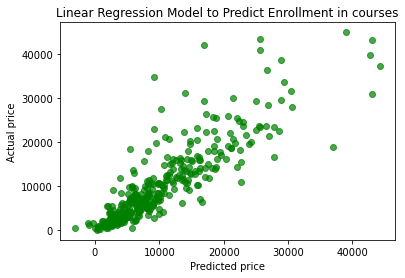

In [165]:
rmse_list = []
r2_list = []
model_list = []
# for loop
for a in alphas:
    ridge = Ridge(alpha = a, normalize = False, max_iter = 1000)
    ridge.fit(X_train, Y_train)
    Y_pred = ridge.predict(X_test)
    
    r2_list.append(ridge.score(X_train, Y_train))
    rmse1 = mean_squared_error(Y_test, Y_pred)**0.5
    rmse_list.append(rmse1) # appending the RMSE
    
    model_list.append(ridge)
#     print("Alpha %.3f RMSE %.3f" %(a, rmse1))
    
ridge_result = np.vstack((alphas, rmse_list, r2_list)).T
# creating the dataframe
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha','RMSE',"R2"])
best_model = model_list[7]
print(pd.Series(best_model.coef_,index=features.columns))


# plot the prediction vs actual
plt.scatter(Y_pred, Y_test, alpha=0.7, color='g')
plt.ylabel('Actual price')
plt.xlabel('Predicted price')
plt.title('Linear Regression Model to Predict Enrollment in courses')

According to me, Ridge regression model performs better as compared to other models. I choose this, as its R square is 77.82% and root mean square error is also 4446.89 which is less as compared to all models. After this, if we want to choose other models then we can choose Lasso regression model as their root mean square error is too low as compared to others. From the actual vs predicted values, we can see there is positive relationship and after 35000 there could be outliers. We can remove those in order to improve our machine learning model.